<a href="https://colab.research.google.com/github/tanyaclement/IntroDH/blob/master/social_network/Social_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wk 13 Workshop: Social Network Analysis


Taken from [https://medium.com/@finalfire](https://medium.com/@finalfire)

Tutorial has been modified using Walsh's Introduction to Cultutral Analytics Section on Network Analysis [https://melaniewalsh.github.io/Intro-Cultural-Analytics/06-Network-Analysis/00-Network-Analysis.html]

In this workshop you will use your own assigned data set found [here](https://drive.google.com/drive/folders/1qPhEH3d-_4C8_47A-xFA49YuV_dx9aOG?usp=share_link)

Each group will be assigned a novel at random 😉 your task will be to guess what novel you are analyzing.

## 1 Set up of data 🔀

To load the data into your colab please follow these steps:


1.   Download group `Characters_list.txt` and `text.txt`
2.   Click on the folder icon 📁 on the left pane.
3.   Once the right pane opens click the upload icon that has a page with an arrow pointing up.
4.  You may upload both `Characters_list.txt` and `text.txt`. wait for the orange circles to disappear so you can use the data with out any issues.




In [3]:
# lets start sorting our character database!
! pip install tinydb

In [6]:
from tinydb import TinyDB, Query

db = TinyDB('characters.json')

# read all of the characters from the list
# the list has been created by POS-tagging all of the file 'text'
# using nltk
with open('G7_characters_list.txt') as in_file: #Check the name of your file and make sure it matches ;)
    chars = [row.strip() for row in in_file]
chars

['Celie',
 'Nettie',
 'Fonso',
 'Mr.',
 "Celie's Mother",
 'Annie Julia',
 'Shug',
 'Harpo',
 'Kate',
 'Carrie',
 'Sofia',
 'Bub',
 'Daddy',
 'Tobias',
 'Odessa',
 'Jack',
 'Swain',
 'Henry',
 'Squeak',
 'The Mayor',
 'Miss Millie',
 'Bubber Hodges',
 'Miss Beasley',
 'Corrine',
 'Samuel',
 'Olivia',
 'Adam',
 'Joseph',
 'Billy',
 'Eleanor Jane',
 'Grady',
 'May Ellen',
 'Daisy',
 'Tashi',
 'Jimmy Hodges',
 'Suzie Q',
 'Henrietta',
 'Jerene',
 'Darlene',
 'Doris Baines',
 'Germaine',
 'Stanley Earl',
 'James']

In [7]:
#matplotlib inline
import re
import nltk


def build_regexp(c):
    """
    Creates the appropriate regex for the expressions
    N(M) or N,M
    """
    if '(' in c:
        a, b = c.split(' ')
        b = b[1:-1]
        r = r"{}( {})?".format(a, b)
        return r
    if ',' in c:
        a, b = c.split(',')
        r = r"({}|{})".format(a, b)
        return r
    return r"{}".format(c)


## save everything
with open('G7_characters_list.txt') as x: #if there is an error pointing to this line make sure to check the name of the file matching the code ;)
    characters = [l.strip() for l in x]

with open('G7_text.txt') as x: #if there is an error pointing to this line make sure to check the name of the file matching the code ;)
    text = [l.strip() for l in x]
raw = ' '.join(text)

## map the characters
chars = {}

for it, c in enumerate(characters):
    chars[it] = c
    template = '{}'.format(it)
    regexp = re.compile(build_regexp(c))
    raw = re.sub(regexp, template, raw)

In [8]:
import networkx as nx
nltk.download('punkt')

print('Total characters:', len(characters))

# build the graph
g = nx.Graph()
# add nodes
for c in characters:
    g.add_node(c)

# tokenize the text
words = [n for n in nltk.word_tokenize(raw) if n != ',' and n != '.']

# utils list
characters_rep = [str(i) for i in range(len(characters))]

# forward threshold
fwd_t = 30
# check for each character
for it, c in enumerate(characters):
    for i, word in enumerate(words):
        if word == str(it):
            for d in range(i, i + fwd_t + 1):
                if d < len(words):
                    if words[d] in characters_rep and words[d] != word:
                        src_node = chars[int(word)]
                        target_node = chars[int(words[d])]
                        if target_node not in g[src_node]:
                            g.add_edge(src_node, target_node, weight=1)
                        else:
                            g[src_node][target_node]['weight'] += 1

# remove nodes w/o edges
removed = set()
for node in list(g.nodes()):
    if not g[node]:
        print('Node w/o edges:', node)
        g.remove_node(node)
        removed.add(node)

print('Total characters minus solitude nodes:', len(g.nodes()))

nx.write_graphml(g, 'output.graphml')





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Total characters: 43
Node w/o edges: Fonso
Node w/o edges: Celie's Mother
Node w/o edges: The Mayor
Node w/o edges: Bubber Hodges
Node w/o edges: May Ellen
Node w/o edges: Jimmy Hodges
Node w/o edges: Doris Baines
Node w/o edges: James
Total characters minus solitude nodes: 35


In [9]:
# If you run this and you get no error, then all characters in your list are interconnected.
# If you get an error, that means there may be some characters are not connected to the main network. DO not worry, just continue to the next step
print('Diameter:', nx.diameter(g))
print('Degree centrality:', nx.degree_centrality(g))
print('Betweennes centrality:', nx.betweenness_centrality(g))
print('Closeness centrality:', nx.closeness_centrality(g))
print('Pagerank:', nx.pagerank(g))

Diameter: 4
Degree centrality: {'Celie': 0.5882352941176471, 'Nettie': 0.5294117647058824, 'Mr.': 0.6764705882352942, 'Annie Julia': 0.11764705882352941, 'Shug': 0.7647058823529411, 'Harpo': 0.5294117647058824, 'Kate': 0.14705882352941177, 'Carrie': 0.058823529411764705, 'Sofia': 0.6176470588235294, 'Bub': 0.11764705882352941, 'Daddy': 0.23529411764705882, 'Tobias': 0.11764705882352941, 'Odessa': 0.38235294117647056, 'Jack': 0.2647058823529412, 'Swain': 0.23529411764705882, 'Henry': 0.14705882352941177, 'Squeak': 0.4117647058823529, 'Miss Millie': 0.08823529411764705, 'Miss Beasley': 0.11764705882352941, 'Corrine': 0.29411764705882354, 'Samuel': 0.4411764705882353, 'Olivia': 0.23529411764705882, 'Adam': 0.23529411764705882, 'Joseph': 0.11764705882352941, 'Billy': 0.058823529411764705, 'Eleanor Jane': 0.1764705882352941, 'Grady': 0.3235294117647059, 'Daisy': 0.08823529411764705, 'Tashi': 0.2647058823529412, 'Suzie Q': 0.1764705882352941, 'Henrietta': 0.38235294117647056, 'Jerene': 0.029

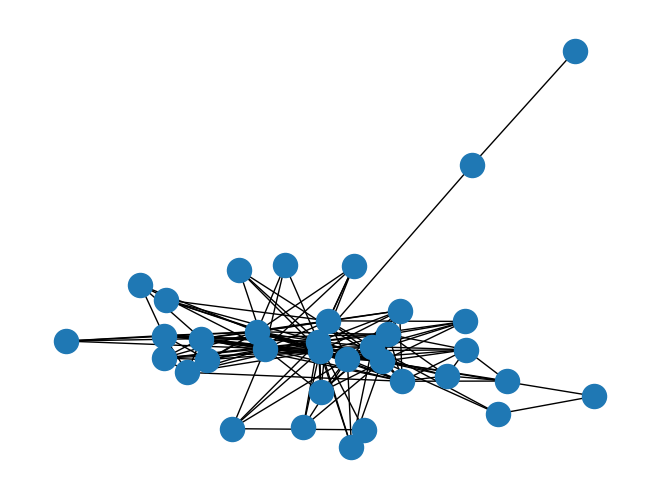

In [10]:
#Let see our initial network graph
nx.draw(g)



Lets ponder...
The code did everything we asked it to, and we got a graph. So why is it soo ugly and confusing?
What could we do better?

Answer here:

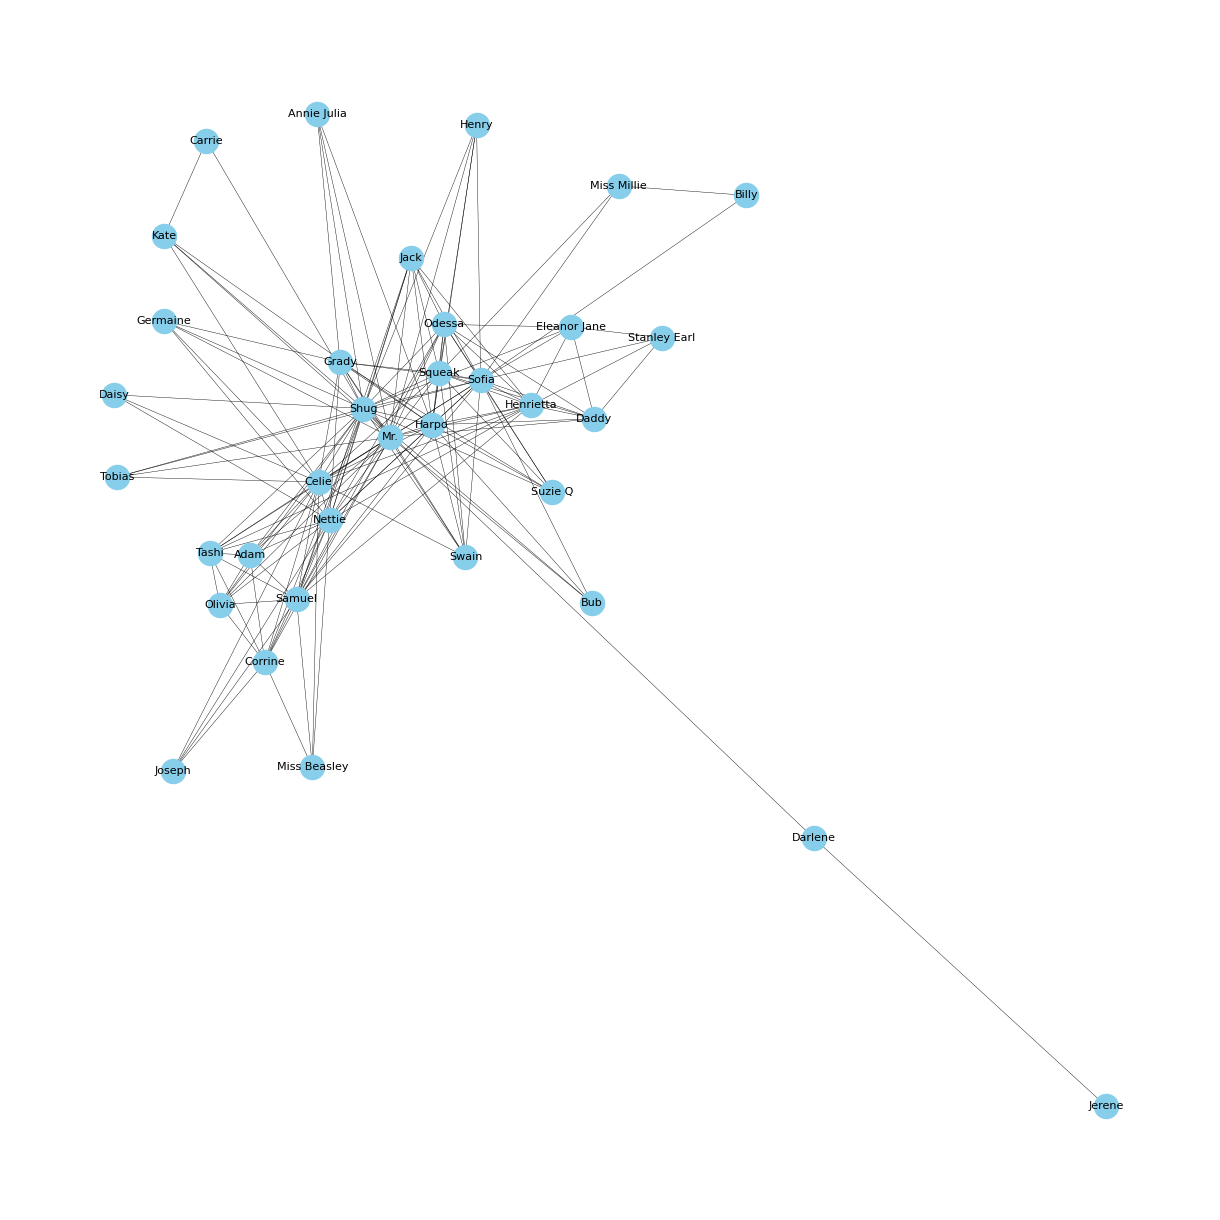

In [11]:
# Well that was ugly... lets try this instead...
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
nx.draw(g, with_labels=True, node_color='skyblue', width=.3, font_size=8)

## 2 Data Inspection and Manipulation 📅

In this portion we will inspect our data and try to decipher what novel you were assigned. We will do this by exploring:
*  Who has the most connections? (*Degree* & *weighted degree*).
*  Who connects the most other nodes in the network (*Betweeness*).
*  Create groupings based on the algorithms (*Community*).

NetworkX has very powerful algorithmic tools that allows us to see the different relationships that arise in the novel and aids us in making predictions.

In [12]:
import pandas as pd

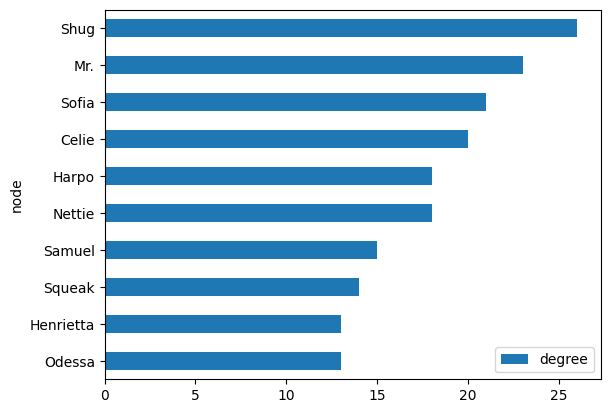

In [13]:
#Degree: Who has the most connections?
#algorithm
nx.degree(g)
#create dictionary
degrees = dict(nx.degree(g))
nx.set_node_attributes(g, name='degree', values=degrees)
#dataframe it <3
degree_df = pd.DataFrame(g.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df
#graph
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()


Lets stop and think...
1.   What are the top 10 characters listed?
2.   What literary work does it remind you of?



 Type answer here:

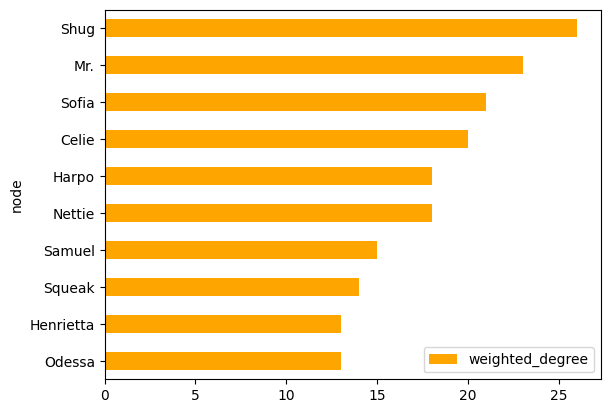

In [14]:
#Degree Weighted: Paying attention to edges, who has the most connections?
#recalibrate the algorithm
nx.degree(g, weight='Weight')
#Dictionary creation
weighted_degrees = dict(nx.degree(g, weight='Weight'))
nx.set_node_attributes(g, name='weighted_degree', values=weighted_degrees)
#Data Fram
weighted_degree_df = pd.DataFrame(g.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df
#graph
num_nodes_to_inspect = 10
weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degree', color='orange', kind='barh').invert_yaxis()


Ok now lets compare and contrast:
1.   Do you see any differences between plot 1 and plot 2?
2.   Has your prediction changed? Why?



Answer:

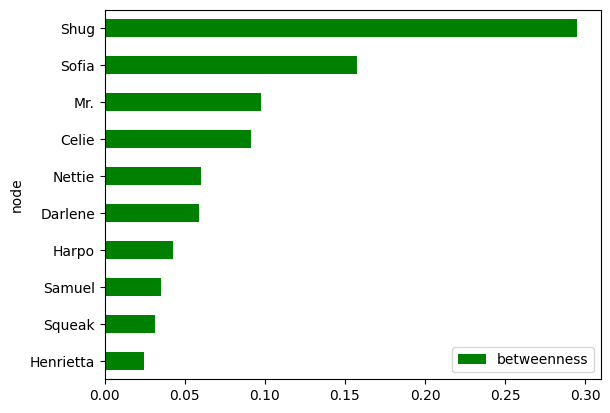

In [15]:
#Betweeness: lets now look who creates the most connections
#Algorithm
nx.betweenness_centrality(g)
# running more algorithms
betweenness_centrality = nx.betweenness_centrality(g)
nx.set_node_attributes(g, name='betweenness', values=betweenness_centrality)
#Dataframing
betweenness_df = pd.DataFrame(g.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df
#graph
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh').invert_yaxis()

Lets pause and answer:


*   Which character has the most connections?
*   Why do you believe this happens?
*   Has your prediction changed? Why?



Answer goes here:

In [16]:
#Lets build groups of characters!!!
from networkx.algorithms import community

In [17]:
#recall function
communities = community.greedy_modularity_communities(g)
communities
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number
nx.set_node_attributes(g, modularity_class, 'modularity_class')
#dataframe
communities_df = pd.DataFrame(g.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)
communities_df


,node,modularity_class
0,Celie,2
28,Tashi,2
22,Adam,2
21,Olivia,2
20,Samuel,2
19,Corrine,2
18,Miss Beasley,2
1,Nettie,2
27,Daisy,2
23,Joseph,2


In [18]:
#Lets visualize it :)
import seaborn as sns

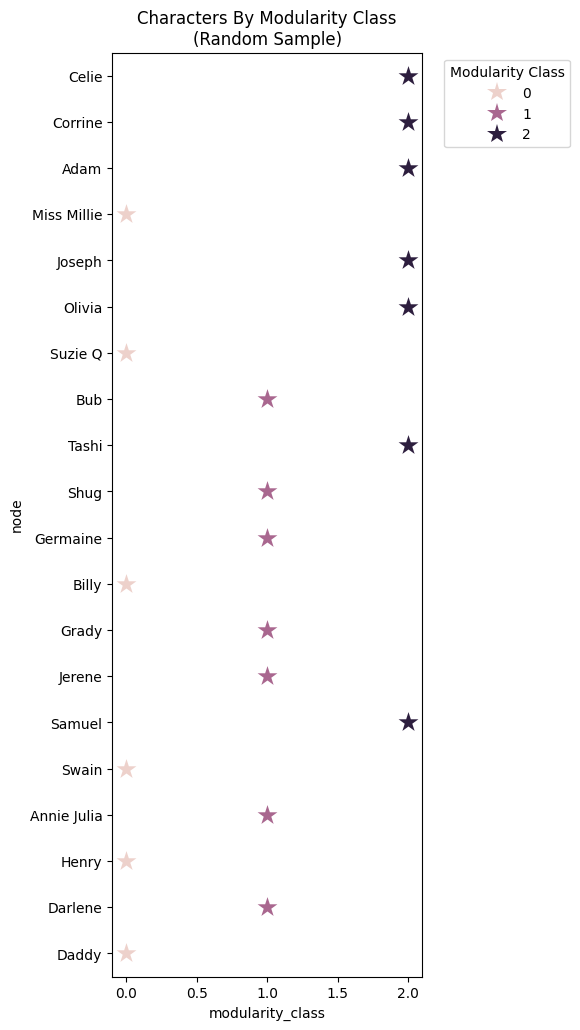

In [19]:
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(20),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Characters By Modularity Class\n(Random Sample)")
plt.show()

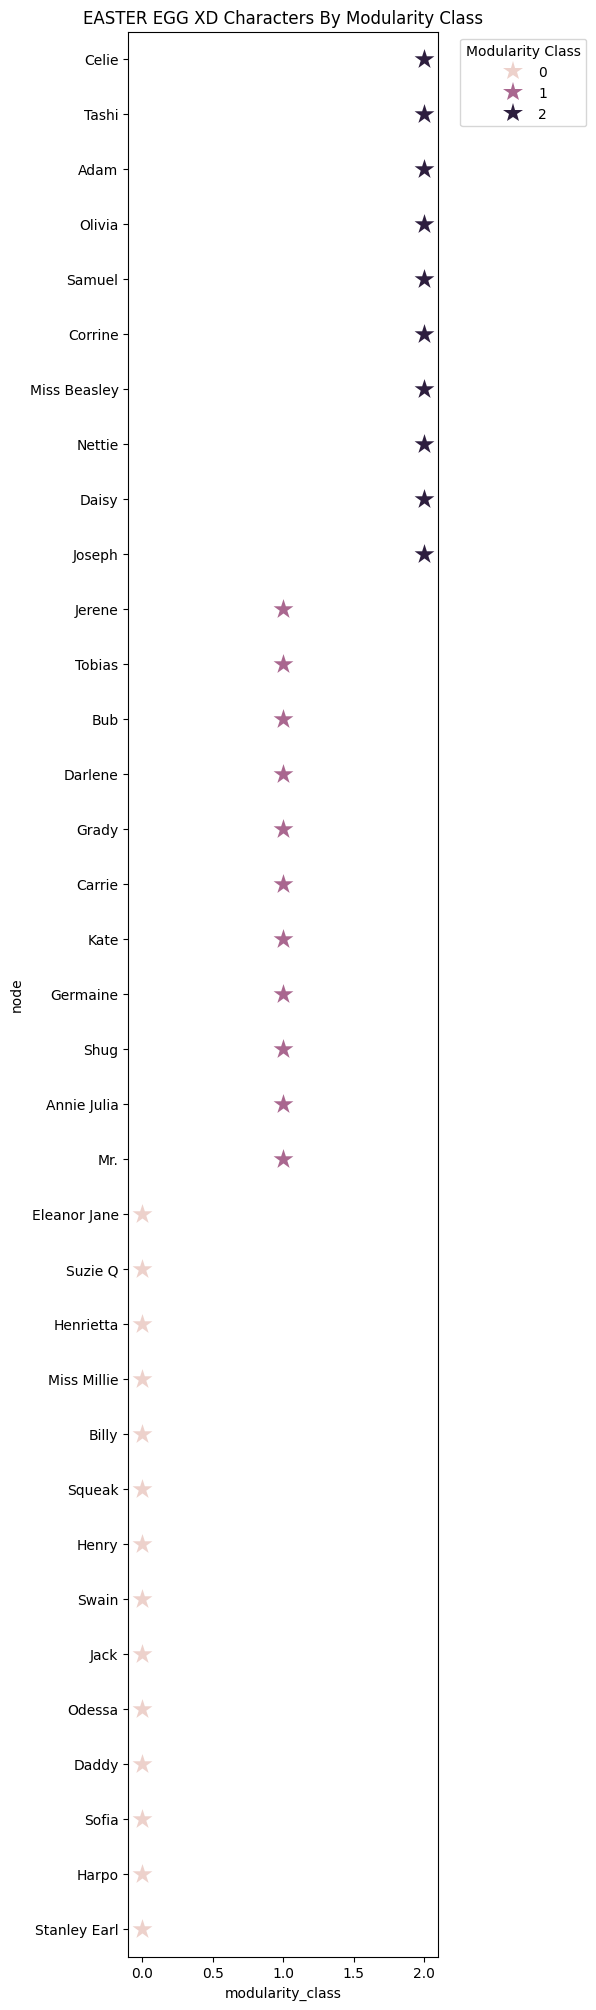

In [20]:
#Lets try to see everyone now
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("EASTER EGG XD Characters By Modularity Class") #Change the title of your graph to reflect the book you think YOU are analyzing ;)
plt.show()

Ok, there's been a lot going on... lets reflect again:


1.   How many communities did your text have?
2.   Do the results align with your initial prediction?



In [21]:
#Lets put all of our algorithmic functions into one table
dict(g.nodes(data=True))
nodes_df = pd.DataFrame(dict(g.nodes(data=True))).T
nodes_df

,degree,weighted_degree,betweenness,modularity_class
Celie,20.0,20.0,0.091398,2.0
Nettie,18.0,18.0,0.060278,2.0
Mr.,23.0,23.0,0.097360,1.0
Annie Julia,4.0,4.0,0.000000,1.0
Shug,26.0,26.0,0.294918,1.0
Harpo,18.0,18.0,0.042677,0.0
Kate,5.0,5.0,0.004214,1.0
Carrie,2.0,2.0,0.000000,1.0
Sofia,21.0,21.0,0.157561,0.0
Bub,4.0,4.0,0.000000,1.0


In [22]:
# if you wish to rearrange...
nodes_df.sort_values(by='betweenness', ascending=False)

,degree,weighted_degree,betweenness,modularity_class
Shug,26.0,26.0,0.294918,1.0
Sofia,21.0,21.0,0.157561,0.0
Mr.,23.0,23.0,0.097360,1.0
Celie,20.0,20.0,0.091398,2.0
Nettie,18.0,18.0,0.060278,2.0
Darlene,2.0,2.0,0.058824,1.0
Harpo,18.0,18.0,0.042677,0.0
Samuel,15.0,15.0,0.035169,2.0
Squeak,14.0,14.0,0.031521,0.0
Henrietta,13.0,13.0,0.024827,0.0


## 3 Better 'Interactive' visualizations 😸

In [23]:
from bokeh.io import output_notebook, show, save

In [24]:
output_notebook()

In [25]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community

In [26]:
degrees = dict(nx.degree(g))
nx.set_node_attributes(g, name='degree', values=degrees)

In [27]:
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in nx.degree(g)])
nx.set_node_attributes(g, name='adjusted_node_size', values=adjusted_node_size)

In [28]:
communities = community.greedy_modularity_communities(g)

In [29]:
# Create empty dictionaries
modularity_class = {}
modularity_color = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    for name in community:
        modularity_class[name] = community_number
        modularity_color[name] = Spectral8[community_number]

In [30]:
# Add modularity class and color as attributes from the network above
nx.set_node_attributes(g, modularity_class, 'modularity_class')
nx.set_node_attributes(g, modularity_color, 'modularity_color')

In [36]:
#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'modularity_color'
#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8
#Choose a title!
title = 'Lord of the Rings<' #Set the Name to the novel you think you are analyzing!

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Character", "@index"),
        ("Degree", "@degree"),
         ("Modularity Class", "@modularity_class"),
        ("Modularity Color", "$color[swatch]:modularity_color"),
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset, tap", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(g, nx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as category from attribute)
# Use 'radius' instead of 'size' for Circle glyph and map 'adjusted_node_size' to node data
network_graph.node_renderer.glyph = Circle(radius='adjusted_node_size', fill_color='modularity_color', radius_dimension='max')


#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

# Ensure the 'adjusted_node_size' values are appropriate for radius. They might need scaling.

The moment of Truth...


1.   What novel did you just analyze?
2.   Which step helped you figure it out? Why?

